# Explore Kernelized SVM and Classify Breast Cancer Data

In this project we shall explore the concept of Kernelized SVM using a synthetic dataset. Visualize decision boundary in 2-d and 3-d space and also learn hyperparameter finetuning.

Later we use this learning to classify Breast cancer data.

In [24]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#settings
%matplotlib inline

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Text(0, 0.5, 'Feature 1')

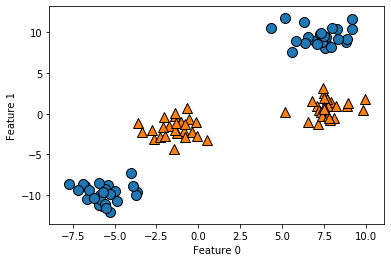

In [6]:
#load data
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

#plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Before we study this data with Kernalized SVM, let's fit a Linear SVM and see why a Linear model would not work on this data.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

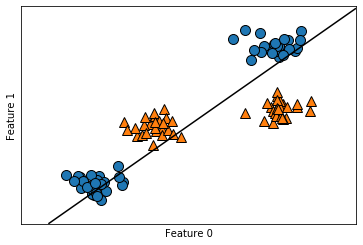

In [8]:
#fit linear SVM
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

This plot clearly shows that a linear model is not a right fit for this data.

Now let's add a new feature (feature1 ** 2) and make this a 3 dimensional data so that we have 3 features (feature0, feature1, feature1 ** 2). We shall Visualize this new data.

Text(0.5, 0, 'feature1 ** 2')

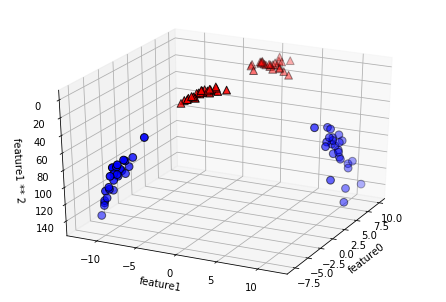

In [10]:
# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], 
           c='b',cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the new representation of the data, it is now indeed possible to separate the two classes using a linear model, a plane in three dimensions.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

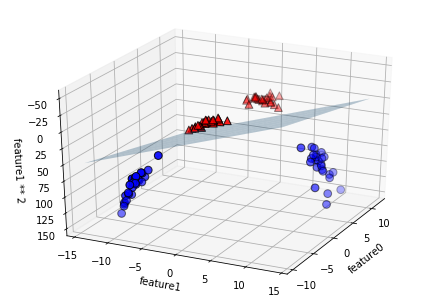

In [11]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore.
It is not a line, but more of an ellipse.

Text(0, 0.5, 'Feature 1')

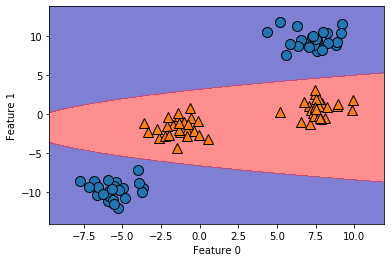

In [12]:
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We saw that by adding a non-linear term to data made linear model more powerful.

### Tuning Parameters
Let's look into Tuning of SVM parameters using a New data.

Text(0, 0.5, 'Feature 1')

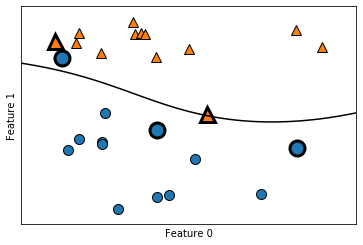

In [14]:
#Load dataset and fit SupportVectorClassifier
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can see a smooth non linear decision boundary seperating the two classes. The data points (circled in blacl) close to the decision boundary actually determine this line. These data points are also called support vectors. There are two parameters which influence what points will be considered as support vectors.

They are *C* and *gamma*. Let's try different numbers and see how they impact the decision boundary.

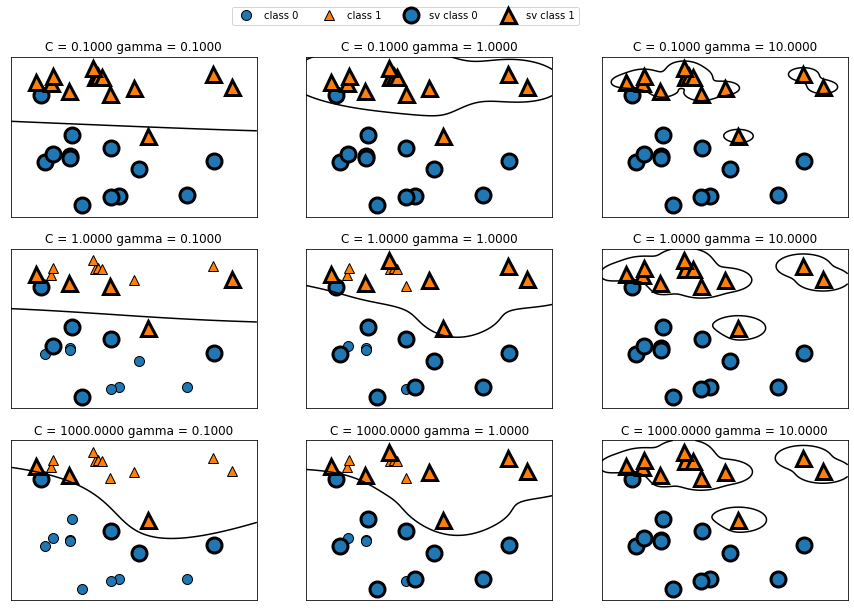

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right. A low value of gamma means that the decision boundary will vary slowly, which yields a model of low complexity, while a high value of gamma yields a more complex model.

Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the linear models, a small C means a very restricted model, where each data point can only have very limited influence. You can see that at the top left the decision boundary looks nearly linear, with the misclassified points barely having any influence on the line. Increasing C, as shown on the bottom left, allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.

### Classify Breast Cancer Data using SVM

Firstly, using defaults of parameters, C=1 amd gamma=1/n_features

In [23]:
#split data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#fit model
svc = SVC(gamma="auto")
svc.fit(X_train, y_train)

#prints results
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


With perfect trining accuracy and low test value, this model is overfits quite substantially. Main reason should be different scales of featuers as SVM is sensitive to scaling of the data. Lets normalize data and fit again.

In [25]:
#Scaling data
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#fit model with scaled data
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy.

Let's do hyperparameter optimization and see if the model accuracy imporves.

In [28]:
svc = SVC(C=1000, gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


This score seems to be much better with both scores close to each others as well as close to 100% accuracy.